In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv("diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
data.info()
print("\n data size:",data.size)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

 data size: 6912


In [5]:
df=data
categorical_val = []
continous_val = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

[]

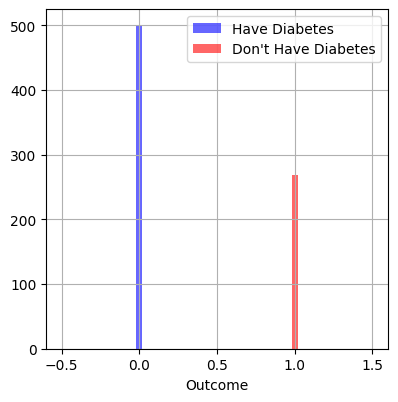

In [6]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["Outcome"] == 1][column].hist(bins=25, color='blue', label='Have Diabetes', alpha=0.6)
    df[df["Outcome"] == 0][column].hist(bins=25, color='red', label="Don't Have Diabetes", alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.plot()

[]

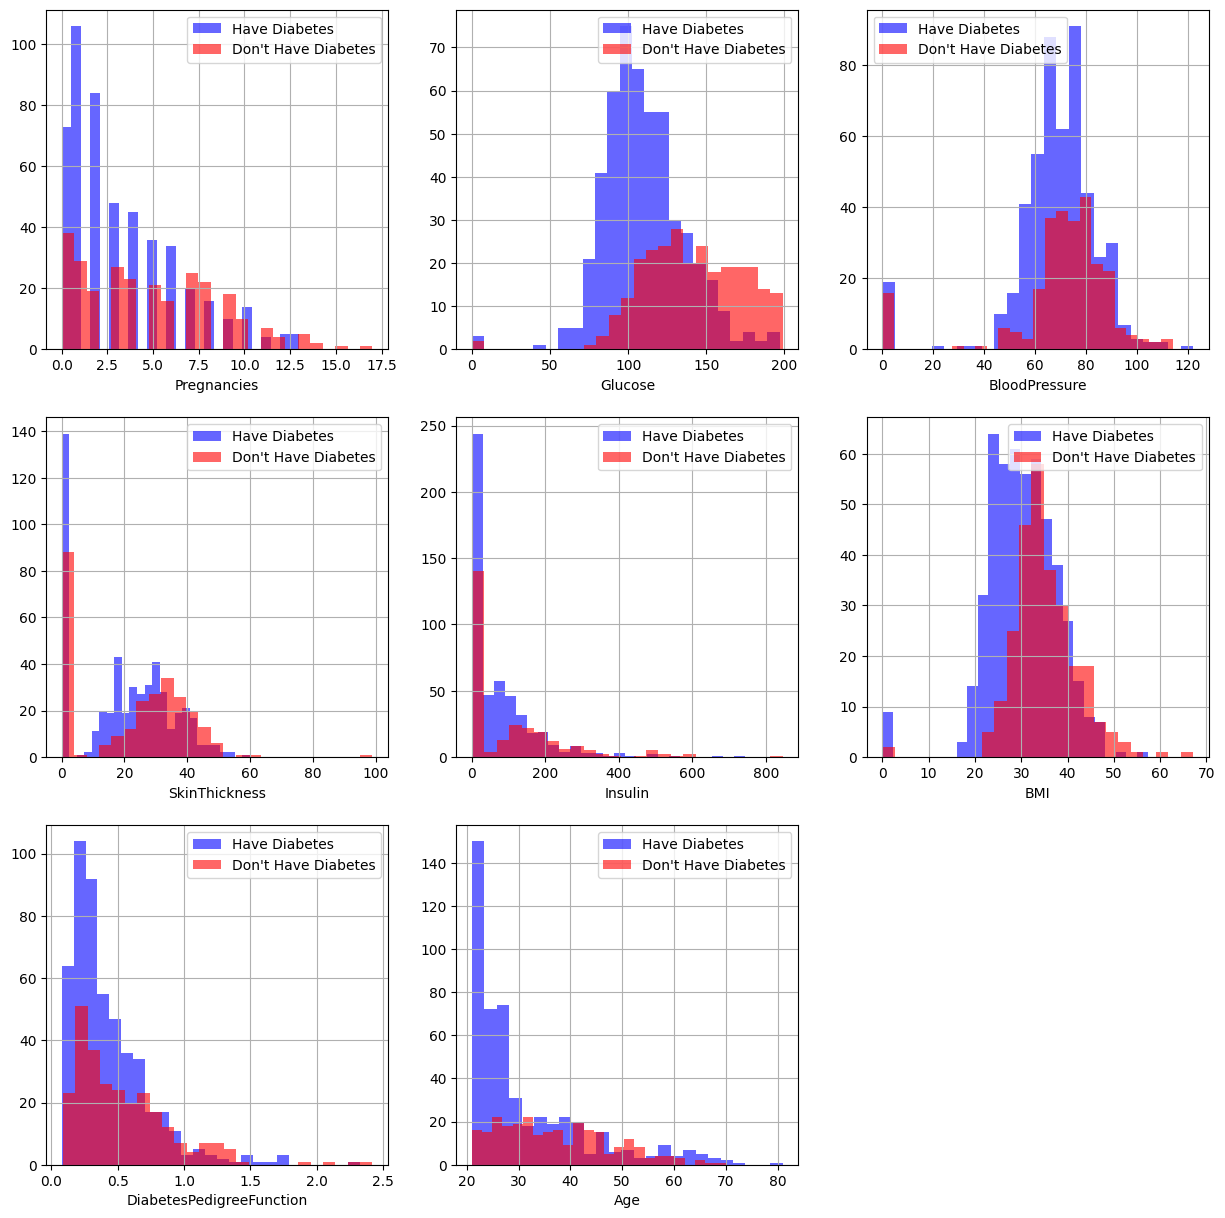

In [7]:
plt.figure(figsize=(15, 15))
for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    df[df["Outcome"] == 0][column].hist(bins=25, color='blue', label='Have Diabetes', alpha=0.6)
    df[df["Outcome"] == 1][column].hist(bins=25, color='red', label="Don't Have Diabetes", alpha=0.6)
    plt.legend()
    plt.xlabel(column)
plt.plot()

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


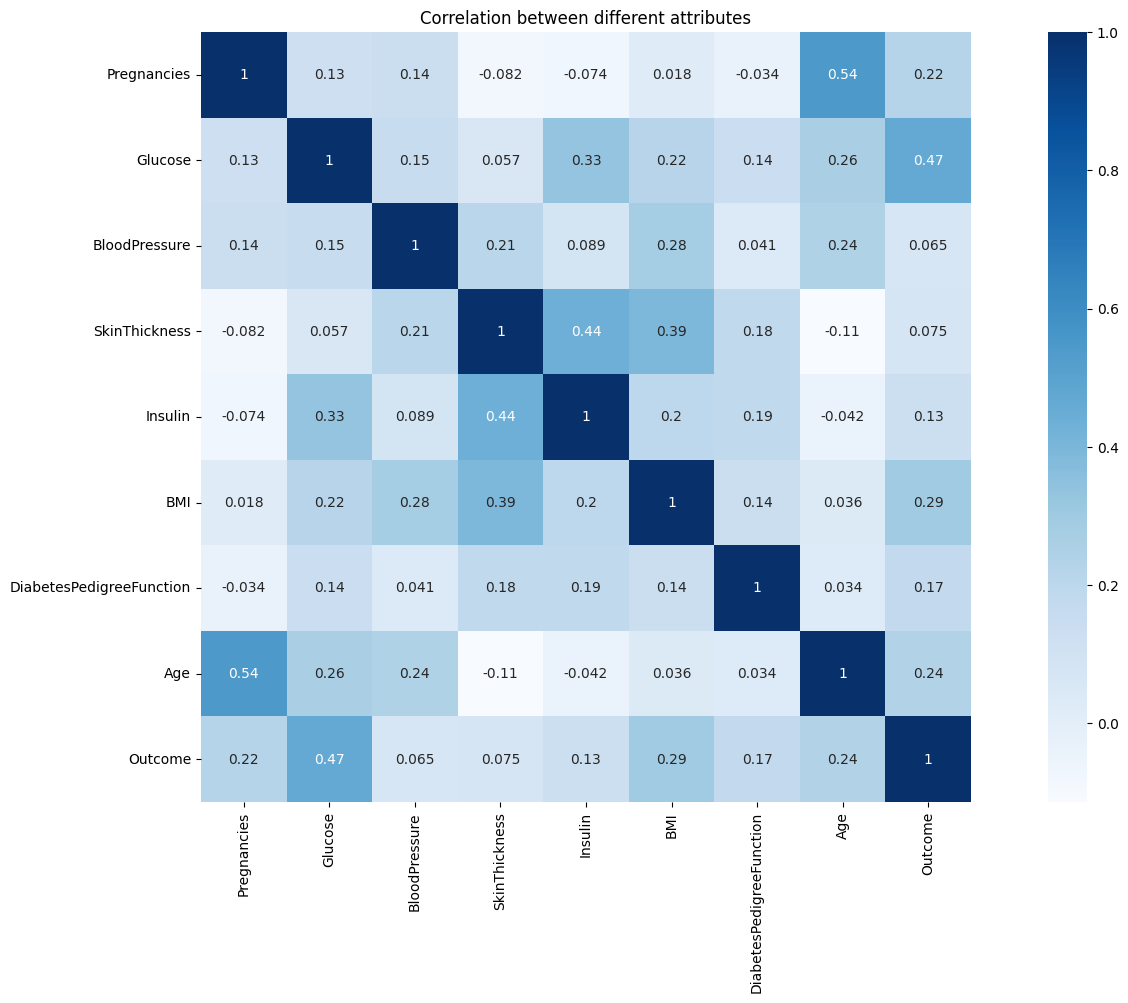

In [9]:
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [10]:
#Correlation with output variable
cor_target = abs(cor["Outcome"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [11]:
#Split the data into predictor variables and target variable, following by breaking them into train and test sets. 
Y = df['Outcome'].values
X = df.drop(['SkinThickness','DiabetesPedigreeFunction','Outcome'], axis=1).values
# standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25,random_state=0)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(576, 6) (192, 6) (576,) (192,)


In [13]:
# Define models to train
models= []
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC())) 
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('LGR', LogisticRegression()))
models.append(('RDC',RandomForestClassifier(n_estimators=20)))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "For %s Model: Mean accuracy is %f (Std accuracy is %f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

For CART Model: Mean accuracy is 0.690926 (Std accuracy is 0.062529)
For SVM Model: Mean accuracy is 0.749849 (Std accuracy is 0.042132)
For NB Model: Mean accuracy is 0.748155 (Std accuracy is 0.047714)
For KNN Model: Mean accuracy is 0.715245 (Std accuracy is 0.039749)
For LGR Model: Mean accuracy is 0.756806 (Std accuracy is 0.044022)
For RDC Model: Mean accuracy is 0.756836 (Std accuracy is 0.045131)


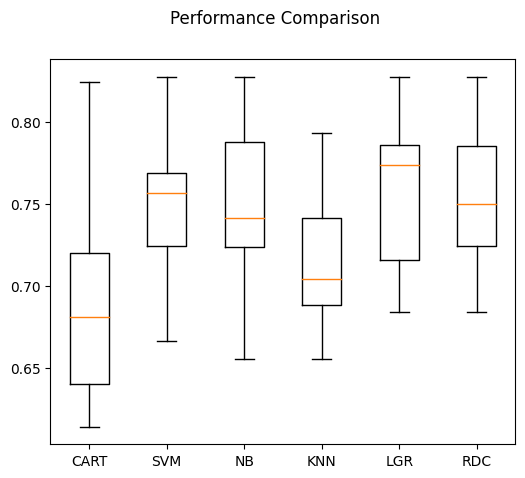

In [14]:
fig = plt.figure(figsize=(6,5))
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
best_model = None
best_accuracy = 0.0
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    print("\nModel:",name)
    print("Accuracy score:",accuracy)
    print("Classification report:\n",classification_report(Y_test, predictions))
    
    # Update the best model if this model has higher accuracy
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy


Model: CART
Accuracy score: 0.7552083333333334
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82       130
           1       0.61      0.66      0.64        62

    accuracy                           0.76       192
   macro avg       0.72      0.73      0.73       192
weighted avg       0.76      0.76      0.76       192


Model: SVM
Accuracy score: 0.78125
Classification report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       130
           1       0.73      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.76      0.71      0.73       192
weighted avg       0.77      0.78      0.77       192


Model: NB
Accuracy score: 0.75
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       130
           1       0.63      0.53      0.58      

In [16]:
# Use the best model to predict on test data
if best_model is not None:
    test_predictions = best_model.predict(X_test)
    print("Best Model:",best_model.__class__.__name__)
    print("Accuracy score:",accuracy_score(Y_test, test_predictions))
    print("Classification report:\n",classification_report(Y_test, test_predictions))
    print("Test Data prediction:\n",test_predictions)
else:
    print("No model was found with accuracy greater than 0.0")

Best Model: LogisticRegression
Accuracy score: 0.796875
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.56      0.64        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192

Test Data prediction:
 [1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


Iteration 1: Accuracy score is 0.796875


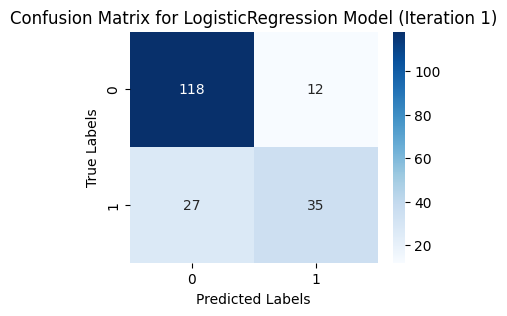

Maximum accuracy reached after 2 iterations: 0.796875


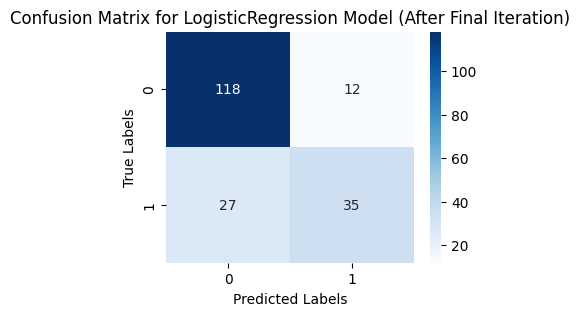

In [17]:
# Iterate over best model with updated predictions until maximum accuracy is reached
max_accuracy = 0.0
iterations = 0
while True:
    iterations += 1
    best_model.fit(X_train, Y_train)
    predictions = best_model.predict(X_test)
    new_accuracy = accuracy_score(Y_test, predictions)
    if new_accuracy > max_accuracy:
        max_accuracy = new_accuracy
        print("Iteration %d: Accuracy score is %f" % (iterations, max_accuracy))
        cm = confusion_matrix(Y_test, predictions)
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
        plt.title("Confusion Matrix for %s Model (Iteration %d)" % (best_model.__class__.__name__, iterations))
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()
    else:
        print("Maximum accuracy reached after %d iterations: %f" % (iterations, max_accuracy))
        cm = confusion_matrix(Y_test, predictions)
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
        plt.title("Confusion Matrix for %s Model (After Final Iteration)" % (best_model.__class__.__name__))
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()
        break


In [ ]:
import pickle

diab_model=  LogisticRegression()
diab_model.fit(X_train,Y_train)

pickle.dump(diab_model,open('diab_model.pkl','wb'))